 -35.0  -0.0000
 -34.0  -0.0000
 -33.0  -0.0001
 -32.0  -0.0001
 -31.0  -0.0001
 -30.0  -0.0001
 -29.0  -0.0001
 -28.0  -0.0001
 -27.0  -0.0000
 -26.0  -0.0000
 -25.0  -0.0000
 -24.0  -0.0000
 -23.0  -0.0000
 -22.0   0.0000
 -21.0  -0.0000
 -20.0   0.0000
 -19.0   0.0000
 -18.0   0.0001
 -17.0   0.0001
 -16.0   0.0002
 -15.0   0.0002
 -14.0   0.0002
 -13.0   0.0001
 -12.0   0.0000
 -11.0  -0.0000
 -10.0  -0.0000
  -9.0   0.0001
  -8.0   0.0004
  -7.0   0.0012
  -6.0   0.0024
  -5.0   0.0044
  -4.0   0.0074
  -3.0   0.0117
  -2.0   0.0176
  -1.0   0.0254
   0.0   0.0343
   1.0   0.0428
   2.0   0.0494
   3.0   0.0532
   4.0   0.0543
   5.0   0.0547
   6.0   0.0571
   7.0   0.0608
   8.0   0.0642
   9.0   0.0663
  10.0   0.0665
  11.0   0.0645
  12.0   0.0603
  13.0   0.0541
  14.0   0.0464
  15.0   0.0377
  16.0   0.0285
  17.0   0.0197
  18.0   0.0118
  19.0   0.0053
  20.0   0.0006
  21.0  -0.0020
  22.0  -0.0027
  23.0  -0.0018
  24.0  -0.0000
  25.0   0.0016
  26.0   0.0018
  27.0  

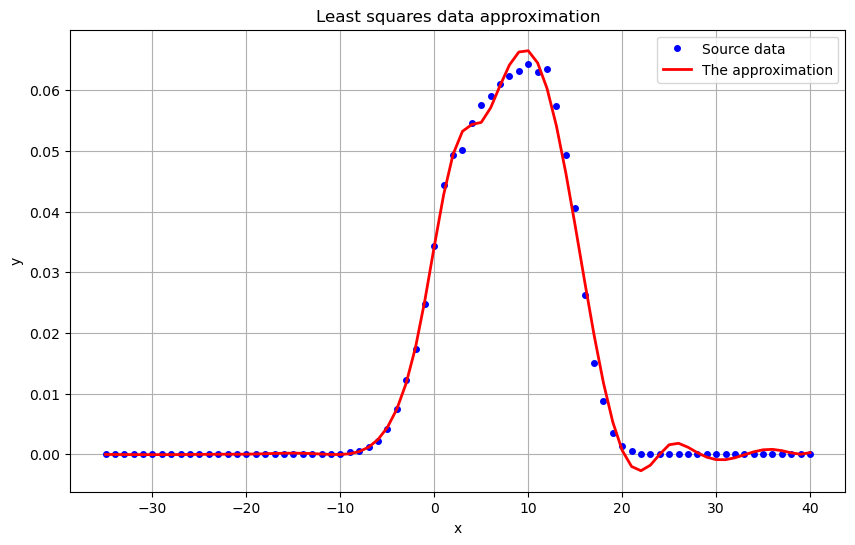

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Базисные функции
def ph0(x):
    x2 = x ** 2
    x3 = x2 * x
    x4 = x3 * x
    x5 = x4 * x
    if x > 0:
        r = 1 - 10 * x3 + 15 * x4 - 6 * x5
    else:
        r = 1 + 10 * x3 + 15 * x4 + 6 * x5
    return r if abs(x) <= 1 else 0.0

def ph1(x):
    x2 = x ** 2
    x3 = x2 * x
    x4 = x3 * x
    x5 = x4 * x
    if x > 0:
        r = x * (1 - 6 * x2 + 8 * x3 - 3 * x4)
    else:
        r = x * (1 - 6 * x2 - 8 * x3 - 3 * x4)
    return r if abs(x) <= 1 else 0.0

def ph2(x):
    x2 = x ** 2
    x3 = x2 * x
    x4 = x3 * x
    x5 = x4 * x
    if x > 0:
        r = x2 - 3 * x3 + 3 * x4 - x5
    else:
        r = x2 + 3 * x3 + 3 * x4 + x5
    return r if abs(x) <= 1 else 0.0

# Метод Гаусса для решения СЛАУ
def gauss(nl, a, x):
    pl = list(range(nl))  # Массив перестановок строк
    sol = True
    for step in range(nl-1):
        abed = 0.0
        nbed = step
        # Поиск ведущего элемента
        for il in range(step, nl):
            current = abs(a[pl[il]][step])
            if current > abed:
                nbed = il
                abed = current
        if abed == 0.0:
            sol = False
            print("sol = false")
            return
        # Перестановка строк
        pl[step], pl[nbed] = pl[nbed], pl[step]
        # Исключение переменных
        for lin in range(step+1, nl):
            if a[pl[step]][step] == 0.0:
                continue  # Избегаем деления на ноль
            r = a[pl[lin]][step] / a[pl[step]][step]
            a[pl[lin]][step] = 0.0
            for st in range(step+1, nl+1):
                a[pl[lin]][st] -= a[pl[step]][st] * r
    # Обратный ход
    if sol:
        for lin in reversed(range(nl)):
            if a[pl[lin]][lin] == 0.0:
                continue  # Избегаем деления на ноль
            if lin == nl-1:
                x[lin] = a[pl[lin]][nl] / a[pl[lin]][lin]
            else:
                sum_val = sum(a[pl[lin]][k] * x[k] for k in range(lin+1, nl))
                x[lin] = (a[pl[lin]][nl] - sum_val) / a[pl[lin]][lin]

# Метод наименьших квадратов
def mnk(m, n, d, fi, x):
    aa = [[0.0]*(m+1) for _ in range(m)]
    for i in range(m):
        # Правая часть
        aa[i][m] = sum(d[l] * fi[i][l] for l in range(n))
        # Матрица системы
        for j in range(m):
            aa[i][j] = sum(fi[i][l] * fi[j][l] for l in range(n))
    # Решение СЛАУ
    gauss(m, aa, x)

# Основная программа
if __name__ == "__main__":
    # Чтение данных
    data = []
    with open('maxTempLondon_results.txt', 'r') as f:
        for line in f:
            line = line.strip()
            if not line:  # Пропуск пустых строк
                continue
            parts = list(map(float, line.split()))
            if len(parts) >= 2:  # Только строки с двумя и более значениями
                data.append(parts)
    
    n = len(data)
    if n == 0:
        raise ValueError("Файл не содержит данных или данные повреждены")
    
    x = [row[0] for row in data]
    y = [row[1] for row in data]

    # Интервалы и шаги
    xx = [-22, -2, 5, 25, 39]
    hh = [
        xx[1] - xx[0],  # hh[0] соответствует Pascal hh[1]
        xx[2] - xx[1],
        xx[3] - xx[2],
        xx[4] - xx[3]
    ]

    # Инициализация базисных функций
    fi = [[0.0]*n for _ in range(11)]  # 11 строк, n столбцов

    # Заполнение матрицы базисных функций
    for i in range(n):
        t = x[i]
        # Первый элемент (Pascal fi[1,i])
        fi[0][i] = hh[0]**2 * ph2((t - xx[0])/hh[0])

        # Обработка интервала 1 (Pascal i1=1, j=2)
        i1_pascal = 1
        if t < xx[i1_pascal]:
            h = hh[i1_pascal-1]
        else:
            h = hh[i1_pascal]
        scaled_x = (t - xx[i1_pascal])/h
        fi[1][i] = ph0(scaled_x)
        fi[2][i] = h * ph1(scaled_x)
        fi[3][i] = h**2 * ph2(scaled_x)

        # Обработка интервала 2 (Pascal i1=2, j=5)
        i1_pascal = 2
        if t < xx[i1_pascal]:
            h = hh[i1_pascal-1]
        else:
            h = hh[i1_pascal]
        scaled_x = (t - xx[i1_pascal])/h
        fi[4][i] = ph0(scaled_x)
        fi[5][i] = h * ph1(scaled_x)
        fi[6][i] = h**2 * ph2(scaled_x)

        # Обработка интервала 3 (Pascal i1=3, j=8)
        i1_pascal = 3
        if t < xx[i1_pascal]:
            h = hh[i1_pascal-1]
        else:
            h = hh[i1_pascal]
        scaled_x = (t - xx[i1_pascal])/h
        fi[7][i] = ph0(scaled_x)
        fi[8][i] = h * ph1(scaled_x)
        fi[9][i] = h**2 * ph2(scaled_x)

        # Последний элемент (Pascal fi[11,i])
        fi[10][i] = hh[3]**2 * ph2((t - xx[4])/hh[3])

    # Решение МНК
    a = [0.0]*11
    mnk(11, n, y, fi, a)

    # Вычисление приближенных значений
    s_values = []
    for i in range(n):
        s = sum(a[j] * fi[j][i] for j in range(11))
        s_values.append(s)
        print(f"{x[i]:6.1f} {s:8.4f}")

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o', label='Source data', markersize=4, color='blue')
    plt.plot(x, s_values, '-', label='The approximation', linewidth=2, color='red')
    plt.title('Least squares data approximation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()